In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 2 Złożona kwadratura Simpsona
Napisz funkcję, która przyjmuje dwa wektory o równej długości:

• wektor x - węzły równoodległe  
• wektor y - wartości funkcji

Porównaj dokładność zaimplementowanej kwadratury z adaptacyjną kwadraturą Simpsona dla przykładowych funkcji i przedziałów całkowania.

In [12]:
def Simpson(x,y):
    return ((x[1] - x[0])/3 * (y[0] + 4*sum(y[::2]) + 2*sum(y[1::2]) + y[-1]))

def f1(x):
    return np.exp(-x**2)*(np.log(x)**2)
def f2(x):
    return 1/(x**3-2*x-5)
def f3(x):
    return (x**5) * np.exp(-x) * np.sin(x)

def result(x0,xn,dens,f,showPlot = False):
    x = np.linspace(x0,xn,dens)
    y = f(x)
    
    if showPlot:
        plt.plot(x,y,linewidth = 1,color='black')
        plt.title(f.__name__)
        plt.show()
        
    simpson = Simpson(x,y)
    scipy = integrate.quad(f,x0,xn)[0]
    print("Simpson: {:.5f}, Scipy: {:.5f}, Diff: {:.5f}".format(simpson,scipy,np.abs(scipy-simpson)))

Wyniki poniżej zaprezentowane są dla różnych gęstości punktów

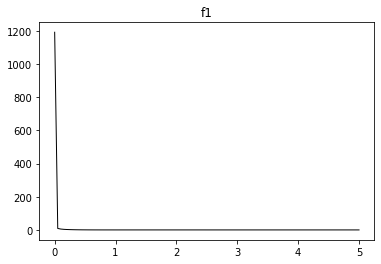

Simpson: 101.66207, Scipy: 1.94752, Diff: 99.71454
Simpson: 11.74224, Scipy: 1.94752, Diff: 9.79472
Simpson: 2.91392, Scipy: 1.94752, Diff: 0.96640


In [26]:
result(10**-15,5,100,f1,True)
result(10**-15,5,1000,f1)
result(10**-15,5,10000,f1)

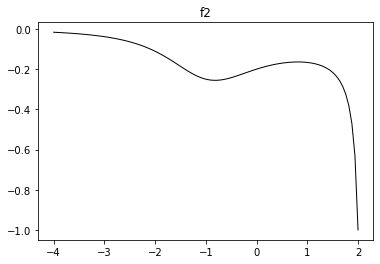

Simpson: -1.01647, Scipy: -0.97479, Diff: 0.04168
Simpson: -0.97889, Scipy: -0.97479, Diff: 0.00410
Simpson: -0.97520, Scipy: -0.97479, Diff: 0.00041


In [27]:
result(-4,2,100,f2,True)
result(-4,2,1000,f2)
result(-4,2,10000,f2)

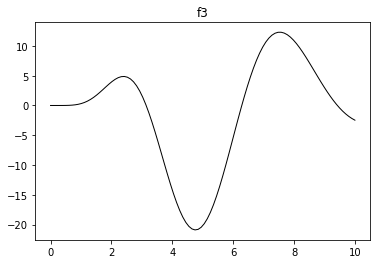

Simpson: -11.05442, Scipy: -10.88810, Diff: 0.16632
Simpson: -10.90458, Scipy: -10.88810, Diff: 0.01648
Simpson: -10.88975, Scipy: -10.88810, Diff: 0.00165


In [28]:
result(0,10,100,f3,True)
result(0,10,1000,f3)
result(0,10,10000,f3)

#### Zadanie 3 Oznaczone całki podwójne
1. Oblicz wartość oznaczonej całki podwójnej dla funkcji f4(x, y) i podanych granic całkowania. Czy wyniki różnią się dla trybu iterated oraz tiled (funkcja integral2, domyślna dokładność)?

In [6]:
def f4(x,y):
    return 1/(np.sqrt(x+y)*(1+x+y))

print(integrate.dblquad(f4,0,1,lambda x : 0, lambda x: 1 - x)[0])

0.42920367291278205


2. Oblicz wartość oznaczonej całki podwójnej dla funkcji f5(x, y) wykorzystując dwukrotnie metodę trapezów. Jak zmienia się dokładność względem liczby punktów siatki 2D? Przy jakim rozmiarze siatki dokładność jest podobna do dokładności uzyskanej za pomocą metody adapatacyjnej (integral2)?

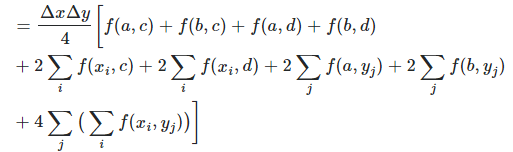

In [16]:
def f5(x,y):
    return x**2+y**2

def trapezoidalRule2D(a,b,c,d,f,dens):
    x = np.linspace(a,b,dens)
    y = np.linspace(c,d,dens)
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    return (dx * dy / 4) * (
        f(a,c) + f(b,c) + f(a,d) + f(b,d) 
        + 2 * (sum(f(x[1:-1],c)) + sum(f(x[1:-1],d)) + sum(f(a,y[1:-1])) + sum(f(b,y[1:-1])))
        + 4 * sum(sum(f(x0,y[1:-1])) for x0 in x[1:-1])
    )

scipy = integrate.dblquad(f5,-3,3,lambda x : -5, lambda x: 5)[0]
print("Trap2D: {:.5f}, Scipy: {:.5f}".format(trapezoidalRule2D(-3,3,-5,5,f5,10**1),scipy))
print("Trap2D: {:.5f}, Scipy: {:.5f}".format(trapezoidalRule2D(-3,3,-5,5,f5,10**2),scipy))
print("Trap2D: {:.8f}, Scipy: {:.8f}".format(trapezoidalRule2D(-3,3,-5,5,f5,10**3),scipy))
print("Trap2D: {:}, Scipy: {:}".format(trapezoidalRule2D(-3,3,-5,5,f5,10**4),scipy))
# print("Trap2D: {:.8f}, Scipy: {:.8f}".format(trapezoidalRule2D(-3,3,-5,5,f5,10**5),scipy))

Trap2D: 696.79012, Scipy: 680.00000
Trap2D: 680.13876, Scipy: 680.00000
Trap2D: 680.00136272, Scipy: 680.00000000
Trap2D: 680.0000136023988, Scipy: 680.0


Wynik jest podobnie dokładny przy siatce wielkości $10^4$